# MIS 584 Project Code - Portuguese Bank Marketing Data

## Import Dependencies

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.tree import export_graphviz
import seaborn as sns
from six import StringIO
from IPython.display import Image  
import pydotplus
path = 'bank/'

## Import Data and Clean

In [116]:
def featureNames():
    featureNames = df.columns.to_list()
    featureNames.remove('y')
    return featureNames

In [166]:
df = pd.read_csv(path+'bank-full.csv',delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [167]:
# processing
# add categorical columns that need to be converted
catCols = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

for col in catCols:
    # create a dictionary of unique values in column: 
    # {technician: 2,blue-collar: 1}
    uniqDict = dict(zip(df[col].unique(),range(len(df[col].unique()))))
    # use current df column data as key and set new column data to associated value in dict 
    df[col] = [uniqDict[item] for item in df[col]]
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,0,0,0,5,0,261,1,-1,0,0,0
1,44,1,1,1,0,29,0,0,0,5,0,151,1,-1,0,0,0
2,33,2,0,1,0,2,0,1,0,5,0,76,1,-1,0,0,0
3,47,3,0,2,0,1506,0,0,0,5,0,92,1,-1,0,0,0
4,33,4,1,2,0,1,1,0,0,5,0,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,5,977,3,-1,0,0,1
45207,71,5,2,3,0,1729,1,0,1,17,5,456,2,-1,0,0,1
45208,72,5,0,1,0,5715,1,0,1,17,5,1127,5,184,3,3,1
45209,57,3,0,1,0,668,1,0,2,17,5,508,4,-1,0,0,0


In [168]:
# normalize integer columns
intCols = ['age','balance','day','duration','pdays','previous','campaign']

for col in intCols:
    df[col] = round(df[col] /df[col].abs().max(),5)

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.61053,0,0,0,0,0.02098,0,0,0,0.16129,0,0.05307,0.01587,-0.00115,0.00000,0,0
1,0.46316,1,1,1,0,0.00028,0,0,0,0.16129,0,0.03070,0.01587,-0.00115,0.00000,0,0
2,0.34737,2,0,1,0,0.00002,0,1,0,0.16129,0,0.01545,0.01587,-0.00115,0.00000,0,0
3,0.49474,3,0,2,0,0.01475,0,0,0,0.16129,0,0.01871,0.01587,-0.00115,0.00000,0,0
4,0.34737,4,1,2,0,0.00001,1,0,0,0.16129,0,0.04026,0.01587,-0.00115,0.00000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.53684,1,0,0,0,0.00808,1,0,1,0.54839,5,0.19866,0.04762,-0.00115,0.00000,0,1
45207,0.74737,5,2,3,0,0.01693,1,0,1,0.54839,5,0.09272,0.03175,-0.00115,0.00000,0,1
45208,0.75789,5,0,1,0,0.05596,1,0,1,0.54839,5,0.22916,0.07937,0.21125,0.01091,3,1
45209,0.60000,3,0,1,0,0.00654,1,0,2,0.54839,5,0.10329,0.06349,-0.00115,0.00000,0,0


# Data Exploration

In [169]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.430907,3.526133,0.513238,1.049944,0.018027,0.013339,0.444162,0.160226,0.776293,0.509885,2.940722,0.052493,0.043871,0.046150,0.002110,0.290062,0.116985
std,0.111776,3.098343,0.692948,0.968986,0.133049,0.029814,0.496878,0.366820,0.549747,0.268467,3.179741,0.052364,0.049175,0.114959,0.008376,0.698469,0.321406
min,0.189470,0.000000,0.000000,0.000000,0.000000,-0.078520,0.000000,0.000000,0.000000,0.032260,0.000000,0.000000,0.015870,-0.001150,0.000000,0.000000,0.000000
25%,0.347370,1.000000,0.000000,0.000000,0.000000,0.000710,0.000000,0.000000,0.000000,0.258060,0.000000,0.020940,0.015870,-0.001150,0.000000,0.000000,0.000000
50%,0.410530,3.000000,0.000000,1.000000,0.000000,0.004390,0.000000,0.000000,1.000000,0.516130,2.000000,0.036600,0.031750,-0.001150,0.000000,0.000000,0.000000
75%,0.505260,6.000000,1.000000,1.000000,0.000000,0.013980,1.000000,0.000000,1.000000,0.677420,5.000000,0.064860,0.047620,-0.001150,0.000000,0.000000,0.000000
max,1.000000,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


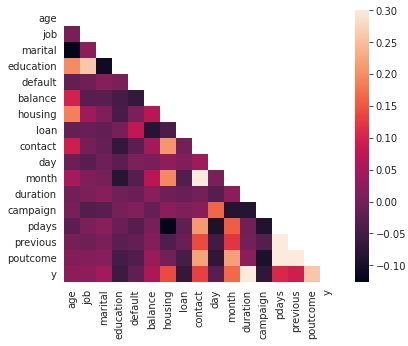

In [170]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [171]:
df.corrwith(df['y']).sort_values(ascending=True)

campaign    -0.073174
loan        -0.068185
education   -0.058675
day         -0.028348
default     -0.022419
job          0.022396
age          0.025155
marital      0.043846
balance      0.052838
previous     0.093241
pdays        0.103622
contact      0.130590
housing      0.139173
month        0.166663
poutcome     0.259315
duration     0.394521
y            1.000000
dtype: float64

# Kmeans

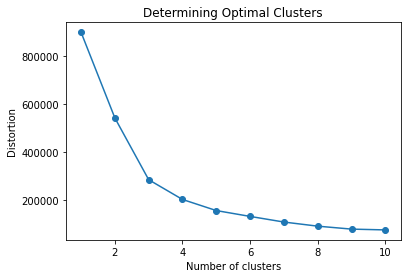

In [172]:
# reduce dimensonionality
pca = PCA(2)
dft = pca.fit_transform(df.to_numpy())
dft

# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(dft)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Determining Optimal Clusters')
plt.show()

Homogeneity: 0.0035
Completeness: 0.0010
V-measure: 0.0015


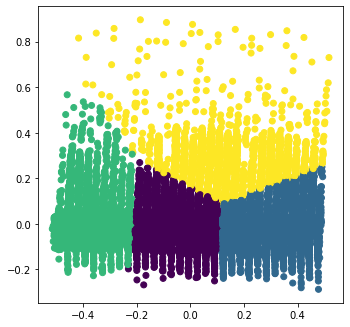

In [173]:
plt.figure(figsize=(12, 12))
random_state = 47
x = df[['age','balance','day','duration','campaign','pdays','previous']].to_numpy()
x = PCA(n_components=2).fit_transform(x)

y = df['y'].to_numpy()

# # # Incorrect number of clusters
km = KMeans(n_clusters=4, random_state=random_state)
kmfp = km.fit_predict(x)

plt.subplot(221)
plt.scatter(x[:, 0],x[:, 1], c=kmfp)

kmf = km.fit(x)
print("Homogeneity: %0.4f" % metrics.homogeneity_score(df.y, kmf.labels_))
print("Completeness: %0.4f" % metrics.completeness_score(df.y, kmf.labels_))
print("V-measure: %0.4f" % metrics.v_measure_score(df.y, kmf.labels_))

# Additional Feature Engineering

## Adding Kmeans Cluster as Label

In [174]:
# Comment out to not add kmeans label
df['kmeans'] = kmf.labels_

In [175]:
df.corrwith(df['y']).sort_values(ascending=True)

campaign    -0.073174
loan        -0.068185
education   -0.058675
day         -0.028348
default     -0.022419
job          0.022396
age          0.025155
kmeans       0.040131
marital      0.043846
balance      0.052838
previous     0.093241
pdays        0.103622
contact      0.130590
housing      0.139173
month        0.166663
poutcome     0.259315
duration     0.394521
y            1.000000
dtype: float64

## Adding Categories for Most Correlated Vars

In [176]:
cols = ['duration','poutcome','month']
for col in cols:
    desc = df[col].to_frame().describe()
    df[col+'_abv_mean'] = np.where(df[col]>= desc.loc['mean'].values[0], 1, 0)

In [177]:
df.corrwith(df['y']).sort_values(ascending=True)

campaign            -0.073174
loan                -0.068185
education           -0.058675
day                 -0.028348
default             -0.022419
job                  0.022396
age                  0.025155
kmeans               0.040131
marital              0.043846
balance              0.052838
previous             0.093241
pdays                0.103622
contact              0.130590
month_abv_mean       0.131399
housing              0.139173
month                0.166663
poutcome_abv_mean    0.167051
poutcome             0.259315
duration_abv_mean    0.302164
duration             0.394521
y                    1.000000
dtype: float64

# Train/ Test Split

In [178]:
# convert to nparray
X = df[featureNames()].to_numpy()
y = df['y'].to_frame().to_numpy()

# make train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Modeling

## Logistic Regression

precision=0.7794767540395433
recall=0.6262191621566001
fscore=0.6639263078691868

Coef


/Users/matthewdvertola/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/matthewdvertola/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,coef
kmeans,0.019013
job,0.019572
previous,0.078167
age,0.089394
month,0.114889
day,0.136194
marital,0.174594
education,0.183159
pdays,0.206788
default,0.255077


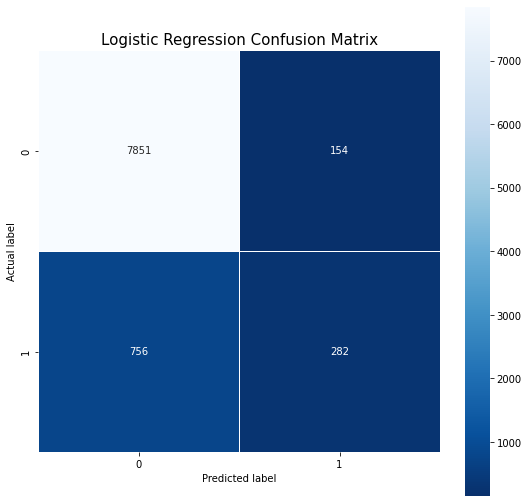

In [179]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

# Create Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="d", linewidths=1, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Logistic Regression Confusion Matrix'
plt.title(all_sample_title, size = 15);
print(f"{precision=}")
print(f"{recall=}")
print(f"{fscore=}")

print('\nCoef')
coef = {}

for i in range(len(LR.coef_[0])):
    coef[featureNames()[i]] = abs(LR.coef_[0][i])
pd.DataFrame.from_dict(coef,orient='index', columns=['coef']).sort_values(by='coef',ascending=True)

## Decision Tree

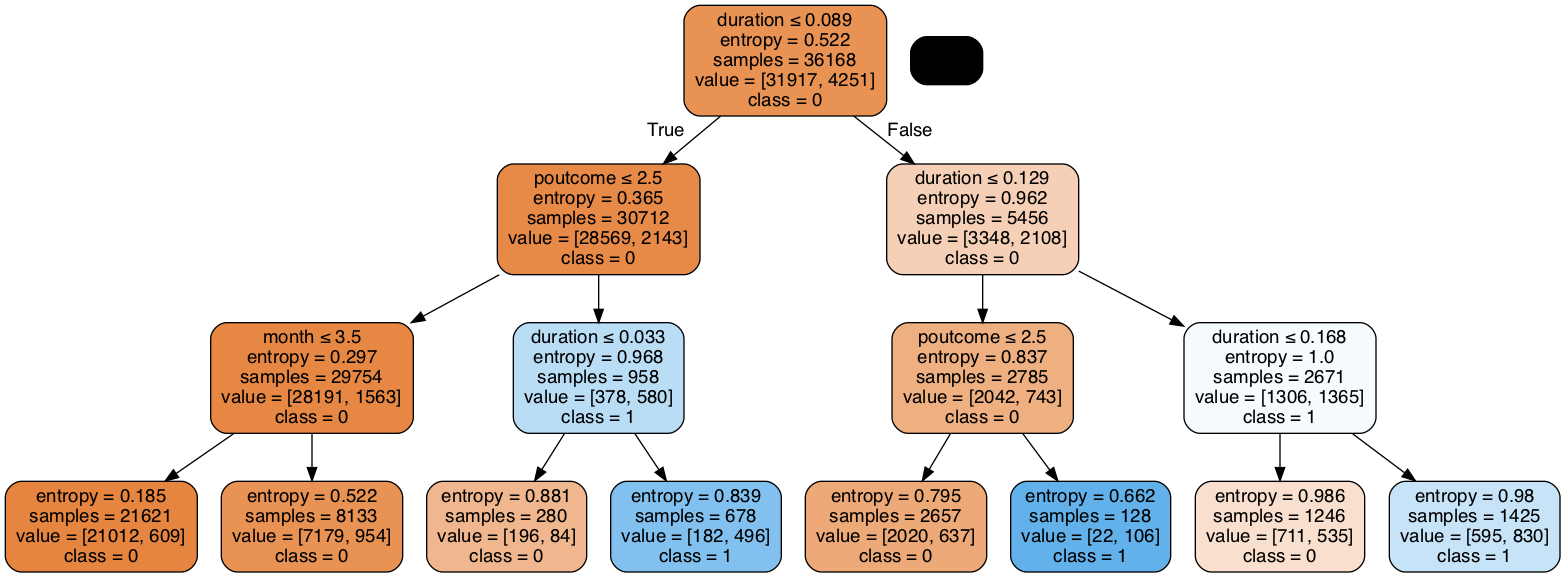

In [180]:
# Create Decision Tree classifer 
DT = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
DT = DT.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = DT.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = featureNames(),class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bank_DT.png')
Image(graph.create_png())


precision=0.7765184559498917
recall=0.6586166641995188
fscore=0.6955680577459663


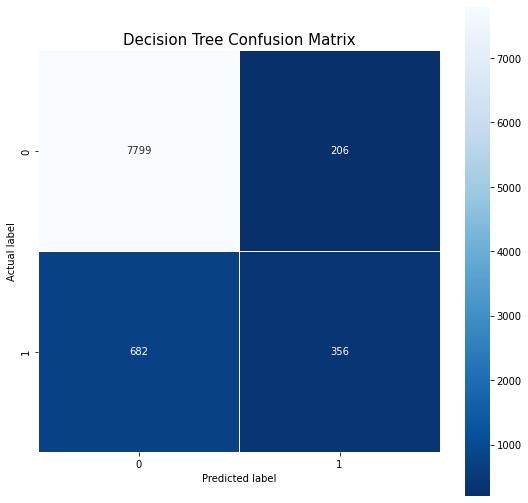

In [181]:
# Create Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="d", linewidths=1, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Decision Tree Confusion Matrix'
plt.title(all_sample_title, size = 15);
print(f"{precision=}")
print(f"{recall=}")
print(f"{fscore=}")